In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

# 1.Problem Statement :-

# 2. Data Gathering

In [2]:
df = pd.read_csv('Super_Store_data.csv',encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# 

# 3. Exploratory Data Analysis

In [3]:
df.info()
# Observations :-
# Some attributes has 'object' datatype.
# we need to convert 'object' datatype to 'int'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
df.isna().sum()
# Observatons :-
# Here no columns contain null values.
# so we dont need to handle missing values.

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# 

# 4. Feature engineering

## A.Converting object datatype into datetime datatype, then extracting various information

### 1. Order Date

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'] )

# Converting attribute'Order Date' which is in 'object' datatype to 'datetime' datatype.

In [6]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
2121 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


In [7]:
# Extracting Year, month, day, month_name
df['Order Year'] = df['Order Date'].dt.year

df['Order Month'] =df['Order Date'].dt.month

df['Order Month name'] = df['Order Date'].dt.month_name()

df['Order Day'] = df['Order Date'].dt.day

In [8]:
#df.head(2)

### 2.Ship Date

In [9]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Converting attribute'Order Date' which is in 'object' datatype to 'datetime' datatype.

In [10]:
df['Ship Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Ship Date
Non-Null Count  Dtype         
--------------  -----         
2121 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 KB


In [11]:
# Now Extractng year,date,month from 'Ship date'

df['Ship Year'] = df['Ship Date'].dt.year
df['Shiper Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Month Name'] = df['Ship Date'].dt.month_name()

In [12]:
df.rename({'Shiper Month':'Ship Month'},axis=1,inplace=True)

In [13]:
#df.head()

In [14]:
# droping some columns
df.drop(['Row ID','Row ID','Order Date','Ship Date','Order ID'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         2121 non-null   object 
 1   Customer ID       2121 non-null   object 
 2   Customer Name     2121 non-null   object 
 3   Segment           2121 non-null   object 
 4   Country           2121 non-null   object 
 5   City              2121 non-null   object 
 6   State             2121 non-null   object 
 7   Postal Code       2121 non-null   int64  
 8   Region            2121 non-null   object 
 9   Product ID        2121 non-null   object 
 10  Category          2121 non-null   object 
 11  Sub-Category      2121 non-null   object 
 12  Product Name      2121 non-null   object 
 13  Sales             2121 non-null   float64
 14  Quantity          2121 non-null   int64  
 15  Discount          2121 non-null   float64
 16  Profit            2121 non-null   float64


# 

# 3. Exploratory Data Analysis 

## A. Data visualisation (EDA Continue)

In [16]:
#df.info()

Text(0.5, 1.0, 'Profit Vs sales')

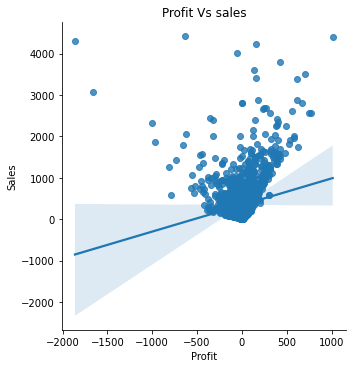

In [17]:
sns.lmplot(x='Profit', y='Sales',data=df)
plt.title('Profit Vs sales')
# Observations :-
# Fromplot we see that, many points from attribute'Profit' are not in linear relation with target column 'Y' i.e. 'Sales'.
# 'Proft' is independent variable.
# We need to handle this attribute.
# This variable also contains an outliers, sowe need yo fix this first.

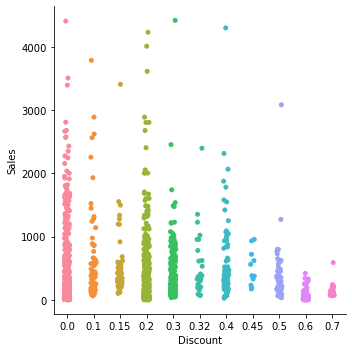

In [18]:
sns.catplot(data=df, x='Discount',y='Sales')

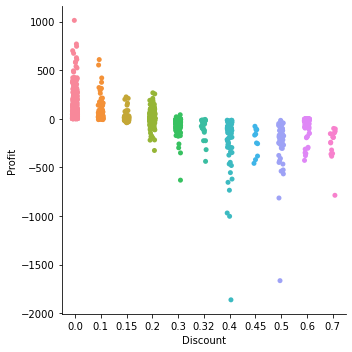

In [19]:
sns.catplot(data=df, x='Discount',y='Profit')

<AxesSubplot:xlabel='Region', ylabel='count'>

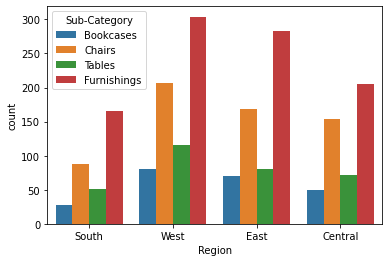

In [20]:
sns.countplot(data=df, x='Region',hue='Sub-Category')

<AxesSubplot:xlabel='Order Year', ylabel='count'>

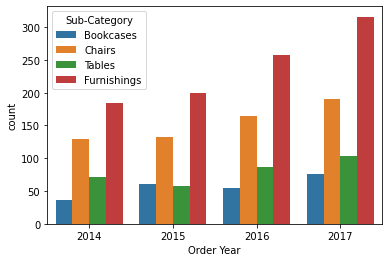

In [21]:
sns.countplot(data=df, x='Order Year',hue='Sub-Category')

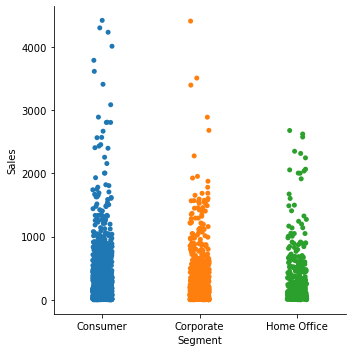

In [22]:
sns.catplot(data=df, x='Segment',y='Sales')

<AxesSubplot:xlabel='Segment', ylabel='count'>

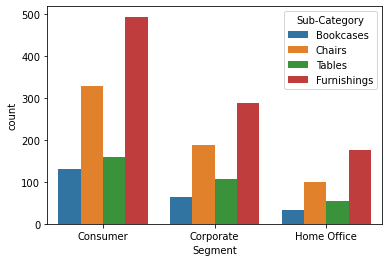

In [23]:
sns.countplot(data=df, x='Segment',hue='Sub-Category')

<AxesSubplot:xlabel='Order Year', ylabel='count'>

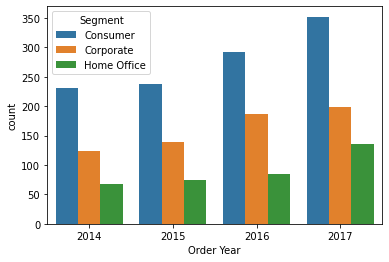

In [24]:
sns.countplot(data=df, x='Order Year',hue='Segment')

In [25]:
#plt.figure(figsize=(10,8))
#sns.countplot(data=df, x='Order Year',hue='Quantity')

<AxesSubplot:xlabel='Order Year', ylabel='count'>

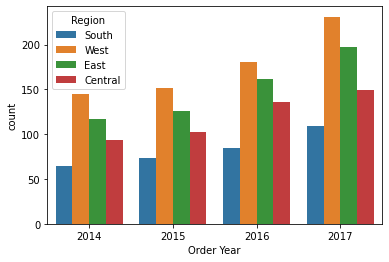

In [26]:
sns.countplot(data=df, x='Order Year',hue='Region')

<AxesSubplot:xlabel='Quantity', ylabel='count'>

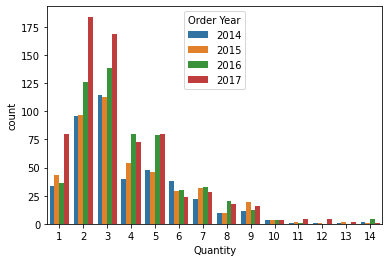

In [27]:
sns.countplot(data=df, x='Quantity',hue='Order Year')

<AxesSubplot:xlabel='Quantity', ylabel='count'>

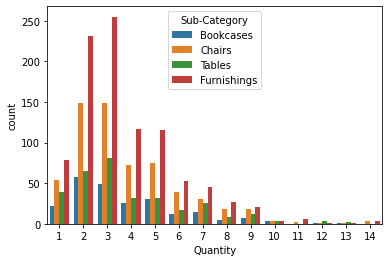

In [28]:
sns.countplot(data=df, x='Quantity',hue='Sub-Category')

In [29]:
#sns.lmplot(data=df, x='Order Month',y='Ship Month')

In [30]:
cat = df.select_dtypes(include='object')
num= df.select_dtypes(include='int')

In [31]:
cat.columns

Index(['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Order Month name', 'Ship Month Name'],
      dtype='object')

In [32]:
num.columns

Index(['Postal Code', 'Quantity', 'Order Year', 'Order Month', 'Order Day',
       'Ship Year', 'Ship Month', 'Ship Day'],
      dtype='object')

# 

# 4. Feature Engineering Continue

## B. Handling Categorical Features

### 1. Ship Mode

In [33]:
df['Ship Mode'].value_counts()

# Observations:-
# This column contains ordinal data. so we are using labelencoder here.

Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship Mode, dtype: int64

In [34]:
label_enc = LabelEncoder()
df['Ship Mode'] = label_enc.fit_transform(df['Ship Mode'])

In [35]:
df['Ship Mode'].value_counts()

3    1248
2     427
0     327
1     119
Name: Ship Mode, dtype: int64

### 2. Segment

In [36]:
#df.head()

In [37]:
df['Segment'].value_counts()

Consumer       1113
Corporate       646
Home Office     362
Name: Segment, dtype: int64

In [38]:
df['Segment'] = df['Segment'].replace({'Consumer' : 0, 'Corporate' : 1, 'Home Office' : 2})

In [39]:
df['Segment'].value_counts()

0    1113
1     646
2     362
Name: Segment, dtype: int64

In [40]:
#df.info()

### 3. Country

In [41]:
df['Country'].value_counts()

United States    2121
Name: Country, dtype: int64

In [42]:
df['Country'] = df['Country'].replace({'United States' : 0})

In [43]:
df['Country'].value_counts()

0    2121
Name: Country, dtype: int64

In [44]:
#df.info()

### 4. City

In [45]:
df['City'].value_counts()

New York City     192
Los Angeles       154
Philadelphia      111
San Francisco     102
Seattle            97
                 ... 
Tyler               1
Port Arthur         1
Citrus Heights      1
Bullhead City       1
Indianapolis        1
Name: City, Length: 371, dtype: int64

In [46]:
df['City'].nunique()

# Observations :-
# we are using labelencoder here.
# we are not using onehotencoder here, because this column contains 371 unique values.
# If we use onehotencoder here, then it increases the many columns in our dataset,
# which increase the complecity of our model

371

In [47]:
df['City'] = label_enc.fit_transform(df['City'])

In [48]:
#df['City'].unique()

### 5. State

In [49]:
print(df['State'].value_counts().to_dict())

# Observations :-
# here also we are using labelencoder for the same reason mention above.

{'California': 444, 'New York': 236, 'Texas': 202, 'Pennsylvania': 125, 'Illinois': 123, 'Washington': 114, 'Ohio': 93, 'Florida': 85, 'Virginia': 52, 'Colorado': 51, 'Michigan': 50, 'Arizona': 49, 'Tennessee': 45, 'North Carolina': 42, 'Massachusetts': 33, 'Georgia': 32, 'Wisconsin': 32, 'Kentucky': 30, 'Maryland': 28, 'New Jersey': 26, 'Indiana': 23, 'Oregon': 21, 'Delaware': 18, 'Rhode Island': 16, 'Oklahoma': 15, 'Minnesota': 13, 'Connecticut': 13, 'Louisiana': 11, 'Alabama': 11, 'Missouri': 11, 'Mississippi': 9, 'Arkansas': 9, 'Nevada': 9, 'Utah': 7, 'New Hampshire': 6, 'South Carolina': 6, 'Idaho': 6, 'New Mexico': 4, 'Nebraska': 4, 'Iowa': 4, 'District of Columbia': 3, 'South Dakota': 2, 'Vermont': 2, 'Kansas': 2, 'Maine': 1, 'Wyoming': 1, 'Montana': 1, 'West Virginia': 1}


In [50]:
df['State'] = label_enc.fit_transform(df['State'])

In [51]:
df['State'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: State
Non-Null Count  Dtype
--------------  -----
2121 non-null   int32
dtypes: int32(1)
memory usage: 8.4 KB


In [52]:
#df.info()

### 6. Region

In [53]:
df['Region'].value_counts()

# This column contains ordinal data. So we are using labelencoder here

West       707
East       601
Central    481
South      332
Name: Region, dtype: int64

In [54]:
df['Region'] = label_enc.fit_transform(df['Region'])

In [55]:
df['Region'].value_counts()

3    707
1    601
0    481
2    332
Name: Region, dtype: int64

In [56]:
#df.info()

### 7. Category

In [57]:
df['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [58]:
df['Category'] = df['Category'].replace({'Furniture' : 0})

In [59]:
df['Category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Category
Non-Null Count  Dtype
--------------  -----
2121 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


In [60]:
#df.info()

### 8. Sub-Category

In [61]:
df['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [62]:
# Using onehotencoder here

In [63]:
df_sub_categogy = pd.get_dummies(df['Sub-Category'],drop_first=True,prefix='Sub_cat')

In [64]:
df_sub_categogy

,Sub_cat_Chairs,Sub_cat_Furnishings,Sub_cat_Tables
0,0,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
2116,0,0,0
2117,0,1,0
2118,0,0,1
2119,0,1,0


In [65]:
#df.T

In [66]:
df.drop('Sub-Category',axis=1,inplace=True)

In [67]:
df = pd.concat([df,df_sub_categogy],axis=1)

In [68]:
#df.join(df_sub_categogy)

In [69]:
#df.info()

### 9. Product Name

In [70]:
df['Product Name'].value_counts()

# Observations :-
# This variable contains 360 unique values.
# Though this column doesn't contains ordinal data, but we are using labelencoder here.
# Because using onehotencoder, it increases the number of columns, which is going to increase the complexity of our model.
# so we prefer labelencoder here.

KI Adjustable-Height Table                                                   18
Staple-based wall hangings                                                   16
Situations Contoured Folding Chairs, 4/Set                                   15
Eldon Wave Desk Accessories                                                  14
Global Wood Trimmed Manager's Task Chair, Khaki                              14
                                                                             ..
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops             1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled      1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs                  1
Ultra Commercial Grade Dual Valve Door Closer                                 1
Name: Product Name, Length: 380, dtype: int64

In [71]:
df['Product Name'].nunique()

380

In [72]:
df['Product Name'] = label_enc.fit_transform(df['Product Name'])

In [73]:
df['Product Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2121 entries, 0 to 2120
Series name: Product Name
Non-Null Count  Dtype
--------------  -----
2121 non-null   int32
dtypes: int32(1)
memory usage: 8.4 KB


In [74]:
#df.info()

In [75]:
df.drop(['Order Month name','Ship Month Name'],axis=1,inplace=True)

In [76]:
#df.info()

In [77]:
df['Customer ID'].nunique()

707

In [78]:
#df['Customer Name'].value_counts()

In [79]:
# droping some columns here.

df.drop(['Customer ID', 'Customer Name'],axis=1,inplace=True)

In [80]:
df.drop('Product ID',axis=1,inplace=True)

In [81]:
#df.drop(['Order Month name','Ship Month Name'],axis=1,inplace=True)

## C. Handling Outliers

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ship Mode            2121 non-null   int32  
 1   Segment              2121 non-null   int64  
 2   Country              2121 non-null   int64  
 3   City                 2121 non-null   int32  
 4   State                2121 non-null   int32  
 5   Postal Code          2121 non-null   int64  
 6   Region               2121 non-null   int32  
 7   Category             2121 non-null   int64  
 8   Product Name         2121 non-null   int32  
 9   Sales                2121 non-null   float64
 10  Quantity             2121 non-null   int64  
 11  Discount             2121 non-null   float64
 12  Profit               2121 non-null   float64
 13  Order Year           2121 non-null   int64  
 14  Order Month          2121 non-null   int64  
 15  Order Day            2121 non-null   i

### 1. Profit

<AxesSubplot:title={'center':'before handling outliers'}, xlabel='Profit'>

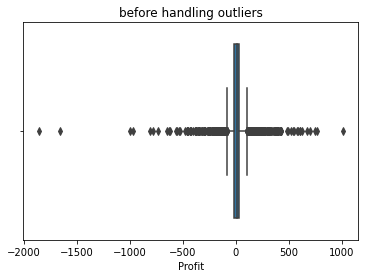

In [83]:
plt.title('before handling outliers')
sns.boxplot(df['Profit'])

# Observations :-
# we see from boxplot that many outliers are present in the variable.

<AxesSubplot:xlabel='Profit', ylabel='Density'>

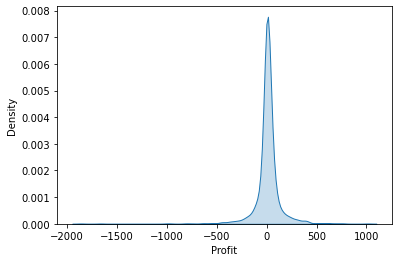

In [84]:
sns.kdeplot(df['Profit'],fill=True)

In [85]:
# using z-score

#outliers_1 = []
#threshold = 3

#mean = np.mean(df['Profit'])
#std = np.std(df['Profit'])

#print('mean of a variable is :-', mean)
#print('std of a variable is :-', std)
#for x in df['Profit']:
#    z_score = (x - mean)/std
#    if np.abs(z_score) > threshold:
#        outliers_1.append(x)
        
#print('Detected outliers are :- ', outliers_1, len(outliers_1))

In [86]:
# using iqr method

q1,q3 = np.percentile(df['Profit'],(25,75))
print('25 percentile :- ', q1)
print('75 percentile :- ', q3)

iqr = q3 - q1
lower_range = q1 - 1.5*(iqr)
upper_range = q3 + 1.5*(iqr)

print('Lower Range :-', lower_range)
print('Upper Range :-', upper_range)
outliers_2 = []
for x in df['Profit']:
    if (x < lower_range) or (x> upper_range):
        outliers_2.append(x)
        
print('Dected outliers are :- ', outliers_2, len(outliers_2))

25 percentile :-  -12.849
75 percentile :-  33.7266
Lower Range :- -82.71239999999999
Upper Range :- 103.58999999999997
Dected outliers are :-  [219.582, -383.031, 240.2649, -1665.0522, -147.963, -114.3912, 165.3813, -407.682, 585.552, 112.392, -161.875, -244.323, 136.939, -102.048, -248.2458, -356.728, -120.513, 580.5394, -131.445, -258.5016, 271.4192, -297.6848, -157.0095, -317.1528, -112.9527, 225.264, -96.1146, -814.4832, -312.0614, -94.941, -84.2928, -217.048, 272.792, -118.1295, -110.49, 231.4116, -153.3456, -167.3184, 179.7488, 311.652, 262.39, -204.4458, -619.596, 131.2785, -290.8752, 356.0414, 316.8825, 213.735, 146.4036, 121.7601, -264.9208, 224.2674, 493.7856, 135.4068, 139.5702, -88.784, 166.1004, -146.1096, -786.744, 118.6575, -90.2484, -430.617, -204.4458, 163.7874, -350.49, -87.3418, 226.9644, 173.7408, -175.8708, 116.872, 203.5644, 196.686, -295.9785, -153.1224, 175.136, 155.25, -373.3048, -227.4912, 113.4936, 321.84, -566.5625, 673.8816, 245.021, -465.568, -122.877, -1

In [87]:
df.loc[df['Profit'] < lower_range, 'Profit'] = lower_range
df.loc[df['Profit'] > upper_range, 'Profit'] = upper_range

<AxesSubplot:title={'center':'after handling outliers'}, xlabel='Profit'>

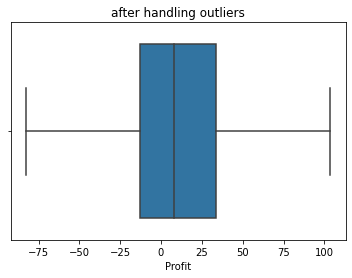

In [88]:
plt.title('after handling outliers')
sns.boxplot(df['Profit'])

# Observations :-
# We are caping outliers to lower and upper range.
# We see fromboxplot, that outliers are completely removed.

<AxesSubplot:xlabel='Profit', ylabel='Density'>

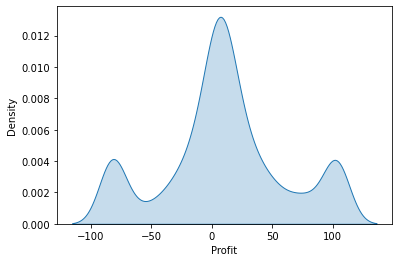

In [89]:
sns.kdeplot(df['Profit'],fill=True)

In [90]:
#sns.scatterplot(x='Profit',y='Sales',data=df)

### 2. Quantity

In [91]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  9,  1,  4,  8,  6, 14, 13, 10, 11, 12],
      dtype=int64)

<AxesSubplot:title={'center':'before handling outliers'}, xlabel='Quantity'>

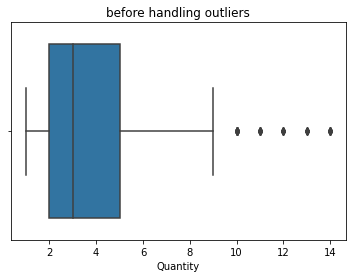

In [92]:
df['Quantity'].value_counts()
plt.title('before handling outliers')
sns.boxplot(df['Quantity'])

# Observations :-
# Though ir look like a numerical variable, but ts counted as a categorical variable.
# so we are imputing outliers with a mode value

In [93]:
# using iqr method

q1,q3 = np.percentile(df['Quantity'],(25,75))
print('25 percentile :- ', q1)
print('75 percentile :- ', q3)

iqr = q3 - q1
lower_range = q1 - 1.5*(iqr)
upper_range = q3 + 1.5*(iqr)
print('lower range :-', lower_range)
print('upper range :-', upper_range)
outliers_3 = []
for x in df['Quantity']:
    if (x < lower_range) or (x> upper_range):
        outliers_3.append(x)
        
print('Dected outliers are :- ', outliers_3, len(outliers_3))

25 percentile :-  2.0
75 percentile :-  5.0
lower range :- -2.5
upper range :- 9.5
Dected outliers are :-  [14, 13, 10, 11, 12, 13, 14, 12, 14, 13, 11, 10, 12, 11, 11, 11, 10, 10, 11, 14, 10, 11, 14, 10, 10, 12, 14, 10, 12, 10, 10, 14, 10, 12, 11, 10, 14, 13, 13] 39


In [94]:
df['Quantity'].mode()[0]

3

In [95]:
df.loc[df['Quantity'] < lower_range, 'Quantity'] = np.nan
df.loc[df['Quantity'] > upper_range, 'Quantity'] = np.nan

In [96]:
df['Quantity'].mode()[0]

3.0

In [97]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])

<AxesSubplot:title={'center':'after handling outliers'}, xlabel='Quantity'>

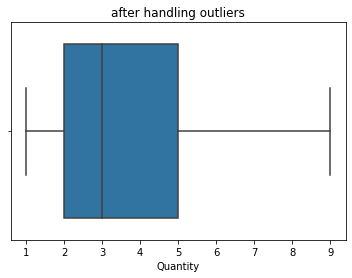

In [98]:
plt.title('after handling outliers')
sns.boxplot(df['Quantity'])

# Observations :-
# Outliers are completely removed.

In [99]:
#df.info()

### 3. Discount

<AxesSubplot:xlabel='Discount'>

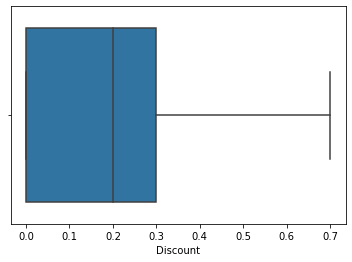

In [100]:
sns.boxplot(df['Discount'])

# Observations :-
# This variable not contain any outliers.

## checking outliers for target variable

<AxesSubplot:xlabel='Sales', ylabel='Density'>

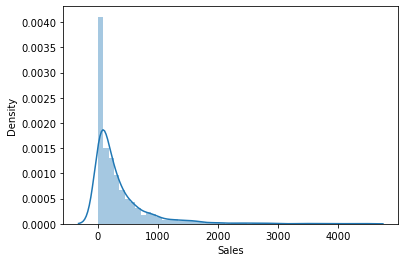

In [101]:
sns.distplot(df['Sales'])

# Observations :
# highly positively skewed data here.
# need log transformation to convert to nearly normally distrubuted data.

<AxesSubplot:title={'center':'before handling outliers'}, xlabel='Sales'>

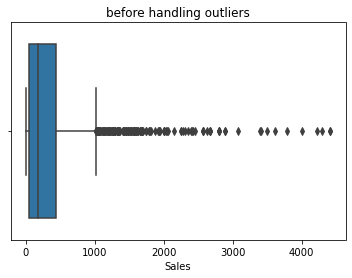

In [102]:
plt.title('before handling outliers')
sns.boxplot(df['Sales'])

# Observations :-
# many outliers present in our target column.
# need to handle these outliers 

In [103]:
# using iqr method

q1,q3 = np.percentile(df['Sales'],(25,75))
print('25 percentile :- ', q1)
print('75 percentile :- ', q3)

iqr = q3 - q1
lower_range = q1 - 1.5*(iqr)
upper_range = q3 + 1.5*(iqr)
print('lower range :-', lower_range)
print('upper range :-', upper_range)
outliers_4 = []
for x in df['Sales']:
    if (x < lower_range) or (x> upper_range):
        outliers_4.append(x)
        
print('Dected outliers are :- ', outliers_4, len(outliers_4))

25 percentile :-  47.04
75 percentile :-  435.168
lower range :- -535.152
upper range :- 1017.36
Dected outliers are :-  [1706.184, 1044.63, 3083.43, 1951.84, 1740.06, 2001.86, 1038.84, 1043.92, 1488.424, 2396.2656, 1336.829, 1272.63, 1121.568, 1335.68, 1049.2, 1652.94, 1298.55, 1228.465, 1242.9, 1114.272, 2065.32, 1166.92, 1090.782, 1618.37, 1267.53, 1106.91, 1067.94, 2244.48, 3610.848, 1141.938, 1819.86, 2453.43, 1024.716, 1669.6, 1573.488, 1044.63, 1018.104, 1931.04, 1048.35, 2807.84, 1441.3, 1282.41, 1024.38, 1586.69, 1212.96, 1552.831, 1579.746, 1071.576, 1322.352, 1137.75, 1348.704, 1406.86, 2665.62, 1218.735, 1292.94, 1139.92, 1603.136, 1628.82, 1526.56, 2054.272, 1123.92, 1408.1, 1421.664, 1202.94, 2430.08, 2003.52, 1056.86, 1458.65, 1684.752, 1424.9, 1604.9, 1049.2, 1487.04, 1805.88, 1279.165, 2404.704, 1268.82, 1325.76, 1352.3976, 1781.682, 1317.492, 1367.84, 3504.9, 1516.2, 2275.5, 2314.116, 1025.88, 1478.272, 2348.82, 1256.22, 1325.76, 1194.165, 1448.82, 1133.35, 1603.136, 

In [104]:
# Observations :-
# it is a target variable, so we are not going to manipulate this target variable.
# Because with this, we may get good accuracy with training data.
# But model will not be robust for unseen data and it will make errors.

In [105]:
# Best Strategy to handle outliers from target variable is :-
# [1]. Either use Log transformation.
# [2]. or Remove extreme values from target variable.

In [106]:
# Performing log transformation 

df['Sales'] = np.log(df['Sales'])

<AxesSubplot:title={'center':'after handling outliers'}, xlabel='Sales'>

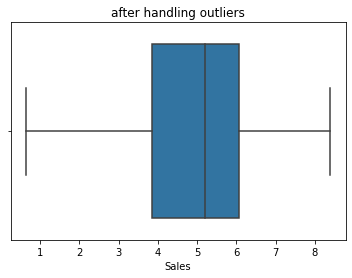

In [107]:
plt.title('after handling outliers')
sns.boxplot(df['Sales'])

# Observations :-
# By log transformation, outliers are completely removed from target variable.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ship Mode            2121 non-null   int32  
 1   Segment              2121 non-null   int64  
 2   Country              2121 non-null   int64  
 3   City                 2121 non-null   int32  
 4   State                2121 non-null   int32  
 5   Postal Code          2121 non-null   int64  
 6   Region               2121 non-null   int32  
 7   Category             2121 non-null   int64  
 8   Product Name         2121 non-null   int32  
 9   Sales                2121 non-null   float64
 10  Quantity             2121 non-null   float64
 11  Discount             2121 non-null   float64
 12  Profit               2121 non-null   float64
 13  Order Year           2121 non-null   int64  
 14  Order Month          2121 non-null   int64  
 15  Order Day            2121 non-null   i

## Splitting the data

In [109]:
x = df.drop('Sales',axis=1)
y = df['Sales']

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# 5.Feature selection

### 1. Information gain

In [111]:
from sklearn.feature_selection import mutual_info_regression

In [112]:
#df.replace([np.inf, -np.inf,np.nan], 0 ,inplace=True)

In [113]:
#np.isnan(df).sum()

In [114]:
info_gain = mutual_info_regression(x,y)
info_gain


array([0.00000000e+00, 0.00000000e+00, 1.07138314e-03, 1.36857552e-02,
       6.23376949e-02, 5.64207603e-02, 5.52076354e-02, 2.10037429e-04,
       4.73691923e-01, 2.72749344e-01, 2.71520519e-01, 9.11789636e-01,
       1.07248189e-02, 0.00000000e+00, 8.59336045e-03, 7.12477857e-03,
       0.00000000e+00, 2.71667307e-03, 1.47409688e-01, 3.53564262e-01,
       8.29835632e-02])

<AxesSubplot:>

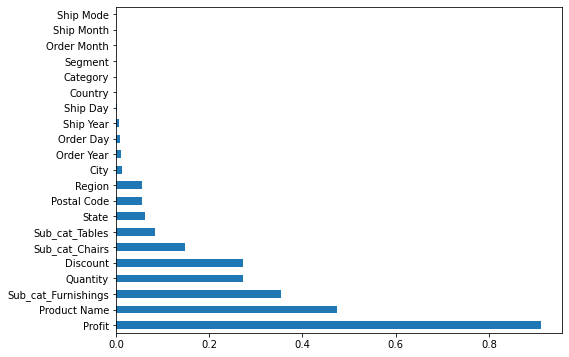

In [115]:
plt.figure(figsize=(8,6))
A = pd.Series(info_gain)
A.index = x.columns
A.sort_values(ascending=False).plot(kind='barh')

In [116]:
# Observations :-
# here we are not dropping any variable.
# We are training the model with all remaining variables

### 2. coefficient of correlation

In [117]:
#plt.figure(figsize=(20,12))
#sns.heatmap(df.corr(),annot=True)

# 6. Model training and evaluation

## Random Forest

In [118]:
Random_model = RandomForestRegressor()
Random_model.fit(x_train,y_train)

RandomForestRegressor()

In [119]:
# testing accuracy without hypertuning

y_pred_test = Random_model.predict(x_test)

r2score = r2_score(y_test,y_pred_test)
print('testing accuracy :- ', r2score)

mse = mean_squared_error(y_test,y_pred_test)
print('testing mse :-', mse)

rmse = np.sqrt(mse)
print('testing rmse :-', rmse)

testing accuracy :-  0.8944873198418055
testing mse :- 0.26001041762187044
testing rmse :- 0.5099121665756471


In [120]:
# training accuracy without hypertuning

y_pred_train = Random_model.predict(x_train)

r2score = r2_score(y_train,y_pred_train)
print('training accuracy :- ', r2score)

mse = mean_squared_error(y_train,y_pred_train)
print('training mse :-', mse)

rmse = np.sqrt(mse)
print('training rmse :-', rmse)

training accuracy :-  0.9837270143527407
training mse :- 0.03507853428041041
training rmse :- 0.18729264342309446


In [121]:
residuals_1 = y_test - y_pred_test
residuals_2 = y_train - y_pred_train

In [122]:
Random_model.score(x_train,y_train)

0.9837270143527407

In [123]:
Random_model.score(x_test,y_test)

0.8944873198418055

### hyperparameter tuning

In [124]:
model = RandomForestRegressor()
hype = {'n_estimators' : np.arange(1,100),
        'max_depth' : np.arange(2,10),
        'min_samples_split' : np.arange(2,10),
        'min_samples_leaf' : np.arange(1,10)}
rscv_model = RandomizedSearchCV(model,hype,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [125]:
rscv_model.best_params_

{'n_estimators': 14,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_depth': 9}

In [139]:
new_model = RandomForestRegressor(n_estimators=14,min_samples_split=9,min_samples_leaf=3,max_depth=9)
new_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=9,
                      n_estimators=14)

In [140]:
# testing accuracy after hypertuning

y_pred_test = new_model.predict(x_test)

r2score = r2_score(y_test,y_pred_test)
print('testing accuracy :- ', r2score)

mse = mean_squared_error(y_test,y_pred_test)
print('testing mse :-', mse)

rmse = np.sqrt(mse)
print('testing rmse :-', rmse)

testing accuracy :-  0.8841454478906927
testing mse :- 0.28549545355280453
testing rmse :- 0.5343177458711291


In [141]:
# training accuracy after hypertuning

y_pred_train = new_model.predict(x_train)

r2score = r2_score(y_train,y_pred_train)
print('training accuracy :- ', r2score)

mse = mean_squared_error(y_train,y_pred_train)
print('training mse :-', mse)

rmse = np.sqrt(mse)
print('training rmse :-', rmse)

training accuracy :-  0.9365315282411923
training mse :- 0.13681453487249629
training rmse :- 0.36988448855351624


In [129]:
residuals_3 = y_test - y_pred_test
residuals_4 = y_train- y_pred_train

# 

# Adaboost model

In [130]:
from sklearn.ensemble import AdaBoostRegressor

In [131]:
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(x_train,y_train)

AdaBoostRegressor()

In [132]:
# testing accuracy without hypertuning

y_pred_test = adaboost_model.predict(x_test)

r2score = r2_score(y_test,y_pred_test)
print('testing accuracy :- ', r2score)

mse = mean_squared_error(y_test,y_pred_test)
print('testing mse :-', mse)

rmse = np.sqrt(mse)
print('testing rmse :-', rmse)

testing accuracy :-  0.8203087719257521
testing mse :- 0.44280546361368683
testing rmse :- 0.6654362956840323


In [133]:
# training accuracy without hypertuning

y_pred_train = adaboost_model.predict(x_train)

r2score = r2_score(y_train,y_pred_train)
print('training accuracy :- ', r2score)

mse = mean_squared_error(y_train,y_pred_train)
print('training mse :-', mse)

rmse = np.sqrt(mse)
print('training rmse :-', rmse)

training accuracy :-  0.8328394008411784
training mse :- 0.36033638417878333
training rmse :- 0.6002802546967403


### Hyper-parameter tuning

In [134]:
ada_hype_model = AdaBoostRegressor()
hype = {'n_estimators' : np.arange(1,100),
        'learning_rate' : np.arange(0.1,5)}
rscv_model = RandomizedSearchCV(ada_hype_model,hype,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([0.1, 1.1, 2.1, 3.1, 4.1]),
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [135]:
rscv_model.best_params_

{'n_estimators': 81, 'learning_rate': 3.1}

In [142]:
ada_new_model = AdaBoostRegressor(n_estimators=81,learning_rate=3.1)
ada_new_model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=3.1, n_estimators=81)

In [143]:
# testing accuracy with hypertuning

y_pred_test = ada_new_model.predict(x_test)

r2score = r2_score(y_test,y_pred_test)
print('testing accuracy :- ', r2score)

mse = mean_squared_error(y_test,y_pred_test)
print('testing mse :-', mse)

rmse = np.sqrt(mse)
print('testing rmse :-', rmse)

testing accuracy :-  0.825173566892295
testing mse :- 0.4308173559379159
testing rmse :- 0.6563667846089684


In [144]:
# training accuracy with hypertuning

y_pred_train = ada_new_model.predict(x_train)

r2score = r2_score(y_train,y_pred_train)
print('training accuracy :- ', r2score)

mse = mean_squared_error(y_train,y_pred_train)
print('training mse :-', mse)

rmse = np.sqrt(mse)
print('training rmse :-', rmse)

training accuracy :-  0.8422452760902499
training mse :- 0.3400607983389231
training rmse :- 0.5831473212996208
